# **Project Name - Yes Bank**

##### **Project Type - Regression**
##### **Contribution - Individual**
##### **Name - Shivan Mishra**

# **Project Summary :--**
*In this project, we aim to predict the monthly closing stock price of Yes Bank using regression models based on historical stock data. The dataset contains monthly values including the opening, highest, lowest, and closing prices of the stock.*

*To perform this task, we implemented and compared three different regression models:*

    *1. Linear Regression*

    *2. Lasso Regression*
    
    *3. K-Nearest Neighbors (KNN) Regressor*
    
*We applied both normalization and standardization techniques during the preprocessing phase to ensure optimal model performance. Data was split into training and testing sets using train_test_split.*

### *Library's are:--*

***1. import numpy as np***

***2. import pandas as pd***

***3. import matplotlib.pyplot as plt***

***4. import seaborn as sns***

***5. from sklearn.linear_model import LinearRegression, Lasso, KNeighborsRegressor***

***6. from sklearn.model_selection import train_test_split as tts***

***7. from sklearn.metrics import mean_absolute_error as mae***

***8. from sklearn.preprocessing import StandardScaler***

#### *Evaluation Metrics Used:- Mean Absolute Error*


# **GitHub Link -**

****

# **Problem Statement :--**

**The main objective is to predict the Stock's Closing price of the Month.**

# ***Let's Begin !***

## ***1. Know Your Data***

### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns       
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler


### **Loading Dataset**

In [33]:
# Step 1: Load the dataset
df = pd.read_csv("data_YesBank_StockPrices.csv")
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### **Dataset First View**

In [3]:
df.head(6)  # Display the first few rows of the dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71


### **Dataset Rows & Columns count**

In [4]:
#Dataset Rows & Columns count
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])
print("Column Names:", df.columns.tolist())

Number of Rows: 185
Number of Columns: 5
Column Names: ['Date', 'Open', 'High', 'Low', 'Close']


### **Dataset Information**

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


### **Checking Duplicate Values / Missing/Null Values**

In [6]:
#Step 2: Checking duplicates and null values
duplicates = df.duplicated().sum()      # Check for duplicate rows  
print(f"Number of duplicate rows: {duplicates}")
null_counts = df.isnull().sum()     # Count null values in each column
print(f"Null values in each column:\n{null_counts}")

Number of duplicate rows: 0
Null values in each column:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


### **What did you know about your dataset?**

📊 Lets Explore What Did We Learn About the Dataset?

The dataset contains historical stock prices of Yes Bank, with 185 rows and 5 columns.

Each row represents stock data for a specific date, and the columns include:

- **Date:** The date of the record (object type; can be converted to datetime)

- **Open:** Stock price at market open

- **High:** Highest price of the day
 
- **Low:** Lowest price of the day
 
- **Close:** Stock price at market close

✅ All columns have complete data — no missing or null values were found.

✅ There are no duplicate rows, indicating the dataset is clean.

🧮 The numeric columns (Open, High, Low, Close) are of type float64, suitable for further statistical analysis and modeling.

## ***2. Understanding Your Variables***

In [7]:
# Dataset Columns
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close']

In [8]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### **Variables Description**

Below is a brief description of each variable in the dataset:

- **Date**: The trading date for each record. While it is not used directly in prediction models, it is important for time-based analysis, trend visualization, and for creating additional time-related features (e.g., day of the week, month).
  
- **Open**: The price at which Yes Bank's stock opened for trading on a given day.

- **High**: The highest price reached by the stock during the trading day.

- **Low**: The lowest price reached by the stock during the trading day.

- **Close**: The final price of the stock at market close. This is often used as the **target variable** for stock price prediction tasks.

> All price-related columns (`Open`, `High`, `Low`, `Close`) are continuous numerical variables and are essential for trend and pattern analysis.


### **Check Unique Values for each variable.**

In [9]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## ***3. Data Wrangling***

### **Data Wrangling Code**

In [10]:

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

df = df.drop_duplicates()

print("Missing values:\n", df.isna().sum())

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

print("\nData types after conversion:\n", df.dtypes)

df = df.reset_index(drop=True)
df.head()


Missing values:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Data types after conversion:
 Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
Month             int32
Year              int32
dtype: object


,Date,Open,High,Low,Close,Month,Year
0,2005-07-01,13.00,14.00,11.25,12.46,7,2005
1,2005-08-01,12.58,14.88,12.55,13.42,8,2005
2,2005-09-01,13.48,14.87,12.27,13.30,9,2005
3,2005-10-01,13.20,14.47,12.40,12.99,10,2005
4,2005-11-01,13.35,13.88,12.88,13.41,11,2005


### **Insights Gained and Manipulations Performed**

#### ✅ Data Manipulations Performed:
- Converted the **`Date`** column from a string like `'Jul-05'` to proper `datetime` format using `%b-%y`
- Created new **`Month`** and **`Year`** columns from the `Date` column for better time-based analysis
- Checked for and confirmed that there are **no missing values** or **null entries**
- Removed any **duplicate rows** (none were found in this case)
- Verified data types to ensure all price-related columns (`Open`, `High`, `Low`, `Close`) are in **float64** format
- Reset the dataframe index after cleaning

#### 📌 Key Insights Observed:
- The dataset contains **monthly stock prices** for Yes Bank
- Data ranges from **July 2005 onward**, with each row representing a **monthly summary**
- All price features (`Open`, `High`, `Low`, `Close`) appear to be **continuous numerical variables**
- No immediate data quality issues like missing or duplicated values were found

This clean dataset is now ready for visualization (EDA) and modeling steps.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***U — Univariate Analysis:--***

### *1. Histogram of Closing Prices*

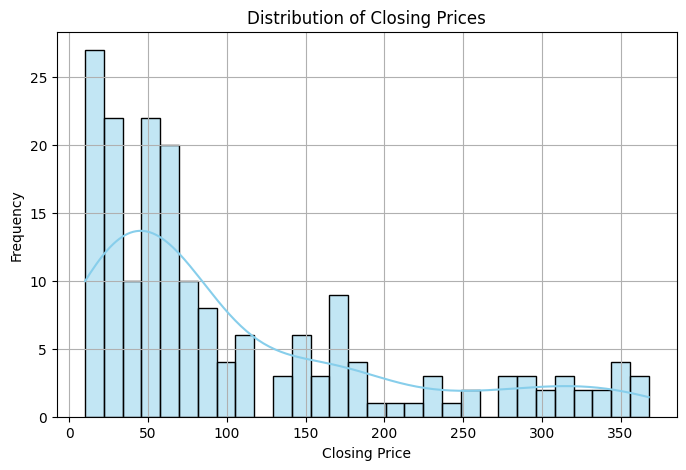

In [11]:
# Chart visualization code
plt.figure(figsize=(8, 5))
sns.histplot(df['Close'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Why this chart?
To understand how the closing prices are distributed — skewed, normal, etc.

Insights:
If prices are clustered around a range or show outliers, we can identify volatility or stability.

Business Impact:
Understanding distribution helps in risk assessment. Skewed data may imply a need for transformation or highlight price manipulation.






































### *2. Box Plot of Opening Price*

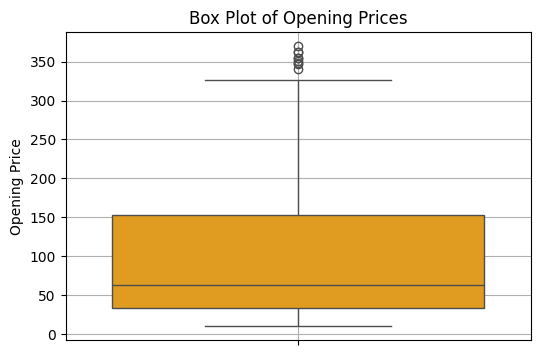

In [12]:
# Chart visualization code
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Open'], color='orange')
plt.title('Box Plot of Opening Prices')
plt.ylabel('Opening Price')
plt.grid(True)
plt.show()


Why this chart?
Box plots are great for identifying outliers and the range of values.

Insights:
Detects unusually high or low starting prices which may need special attention or explain crashes.

Business Impact:
Sudden jumps at market open may imply rumors, news, or manipulation — important for strategy adjustments.


### *3. KDE Plot of High Prices*

C:\Users\shiva\AppData\Local\Temp\ipykernel_18776\677604231.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['High'], shade=True, color='green')


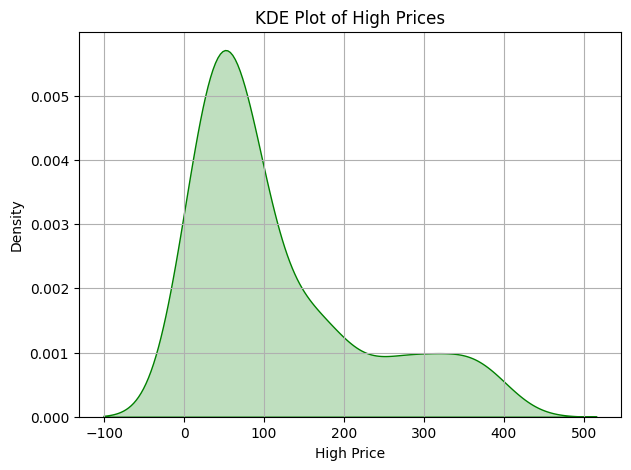

In [13]:
# Chart visualization code
plt.figure(figsize=(7, 5))
sns.kdeplot(df['High'], shade=True, color='green')
plt.title('KDE Plot of High Prices')
plt.xlabel('High Price')
plt.grid(True)
plt.show()


Why this chart?
KDE gives a smooth curve that shows how prices are distributed without bins like histogram.

Insights:
Identifies where most high price values lie — e.g., if there’s a peak at a specific price level.

Business Impact:
Useful for setting resistance points in stock trading models.

### *4. Bar Chart of Month-wise Average Closing Prices*

C:\Users\shiva\AppData\Local\Temp\ipykernel_18776\2410239123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')


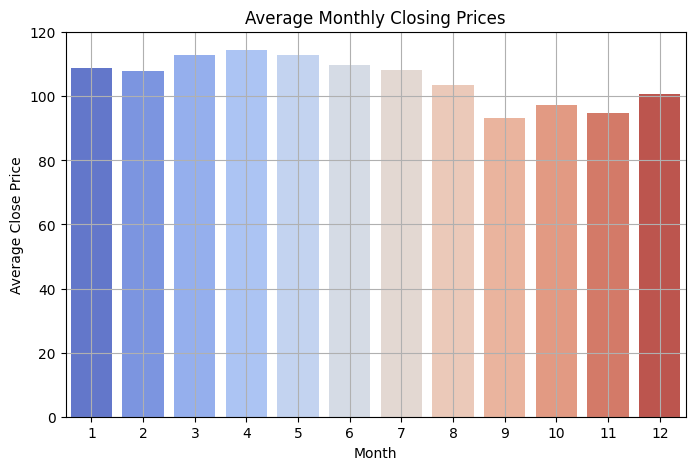

In [14]:
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette='coolwarm')
plt.title('Average Monthly Closing Prices')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.grid(True)
plt.show()


Why this chart?
Detects seasonality in stock prices.

Insights:
Certain months may show higher or lower trends indicating seasonal investor behavior.

Business Impact:
Helps plan entry/exit strategies for investment portfolios based on expected trends.

### *5. Line Plot of Closing Price Over Time*

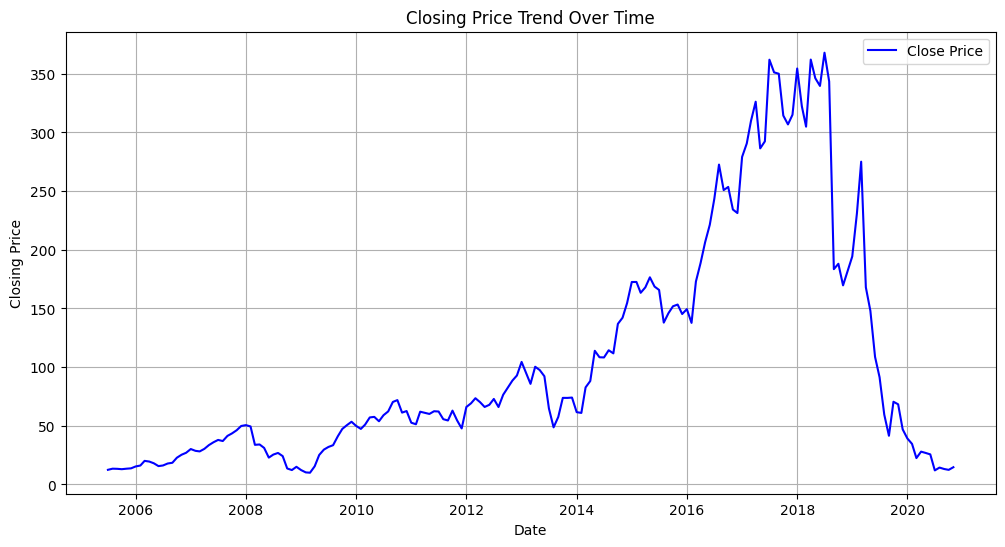

In [15]:
# Chart visualization code
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Closing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()


Why this chart?
To observe trends, spikes, crashes, or steady movement in closing prices.

Insights:
Sharp drops or increases can indicate major events (like the Rana Kapoor fraud case).

Business Impact:
Helps correlate financial events with stock performance for strategic planning.



## ***B — Bivariate Analysis:--***

### *6. Scatter Plot: Opening Price vs Closing Price*

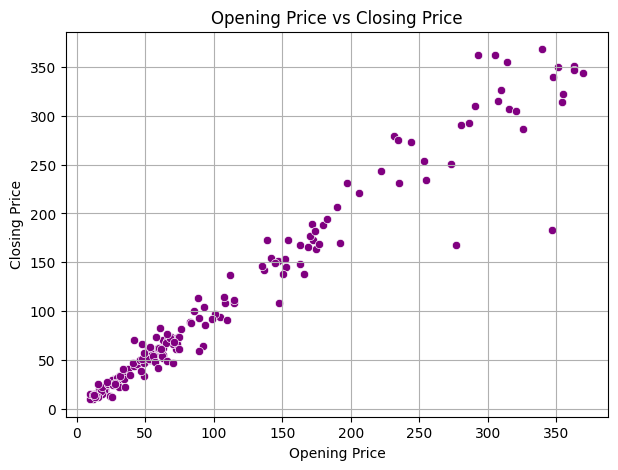

In [16]:
# Chart visualization code
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Open', y='Close', data=df, color='purple')
plt.title('Opening Price vs Closing Price')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Why this chart?
To identify whether there's a linear or non-linear relationship between opening and closing prices.

Insights:
A strong linear pattern indicates the closing price can be predicted using the opening price.

Business Impact:
Useful in short-term trading strategies — if opening price reliably predicts closing price, it enables profitable same-day trading decisions.

### *7. Heatmap: Correlation Matrix of Numerical*

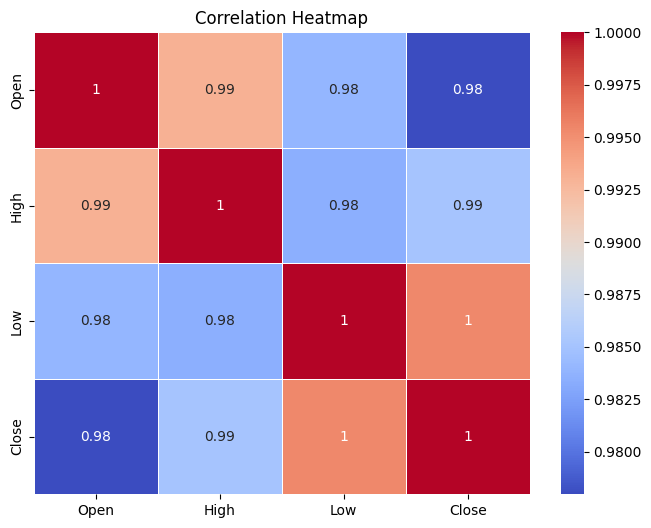

In [17]:
# Chart visualization code
plt.figure(figsize=(8, 6))
corr = df[['Open', 'High', 'Low', 'Close']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Why this chart?
To visualize relationships among all numerical variables.

Insights:
Strong correlations (e.g., Close and High) indicate potential feature redundancy.

Business Impact:
Helps reduce dimensionality by removing or combining highly correlated features, improving model performance and interpretability.

### *8. Pair Plot of Price Features*

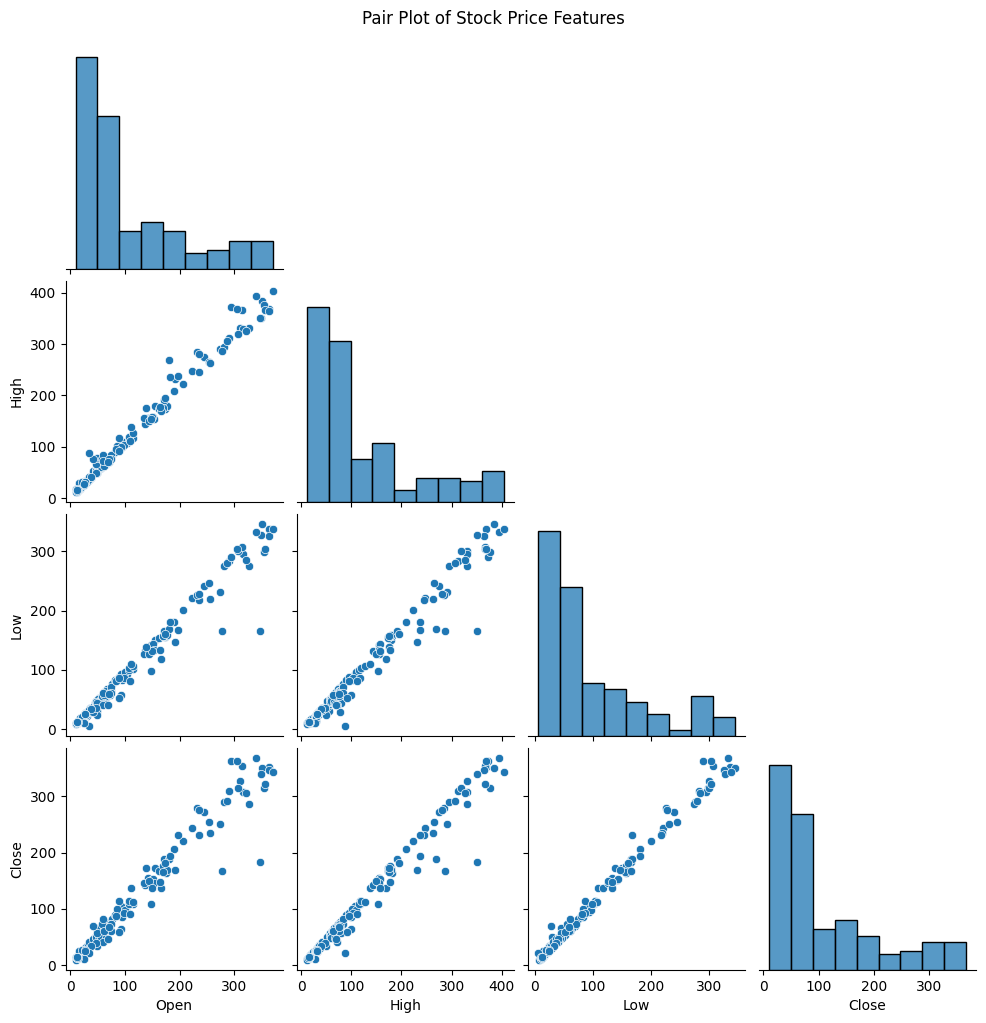

In [18]:
# Chart visualization code
sns.pairplot(df[['Open', 'High', 'Low', 'Close']], corner=True)
plt.suptitle('Pair Plot of Stock Price Features', y=1.02)
plt.show()


Why this chart?
Provides a compact summary of all bivariate relationships and distributions.

Insights:
Detects linear or non-linear dependencies and helps spot outliers.

Business Impact:
Supports selection of features that show strong relationships, increasing model reliability and interpretability.

### *9. Box Plot: Year-wise Closing Prices*

C:\Users\shiva\AppData\Local\Temp\ipykernel_18776\472291511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Close', data=df, palette='Set2')


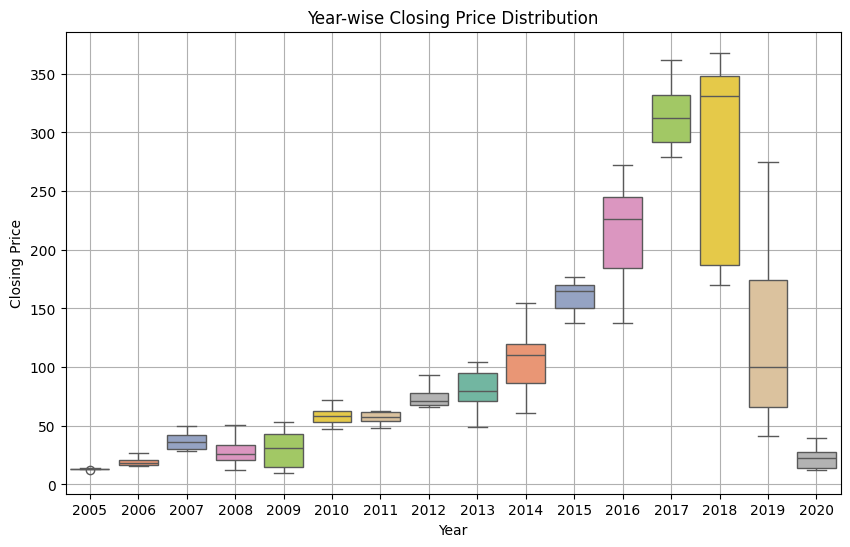

In [19]:
# Chart visualization code
df['Year'] = pd.to_datetime(df['Date']).dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Close', data=df, palette='Set2')
plt.title('Year-wise Closing Price Distribution')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Why this chart?
To see how closing prices vary each year and identify volatility.

Insights:
Certain years (e.g., post-2018) may show a sharp drop in prices, reflecting crises or fraud.

Business Impact:
Tracks historical health of the company. Negative trends signal investor caution or the need for reforms.

### *10. Violin Plot: Closing Price by Quarter*

C:\Users\shiva\AppData\Local\Temp\ipykernel_18776\1555976281.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Quarter', y='Close', data=df, palette='Set3')


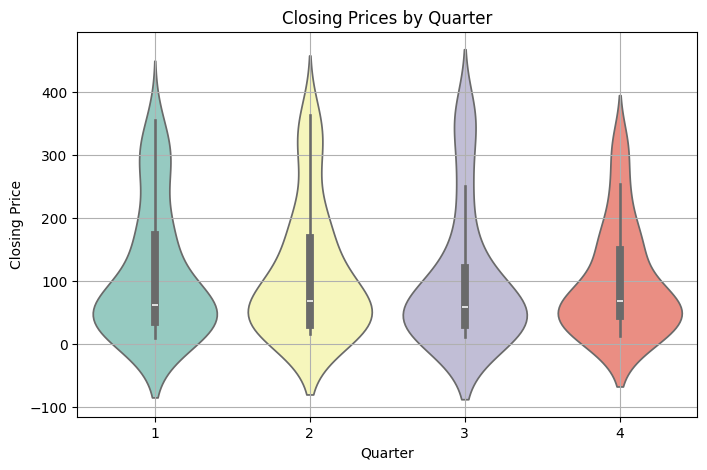

In [20]:
# Chart visualization code
df['Quarter'] = pd.to_datetime(df['Date']).dt.quarter

plt.figure(figsize=(8, 5))
sns.violinplot(x='Quarter', y='Close', data=df, palette='Set3')
plt.title('Closing Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


Why this chart?
To study quarterly trends and distribution shapes (including multi-modal ones).

Insights:
Wider violins show more variability in specific quarters. Can indicate seasonal investment behavior.

Business Impact:
Guides quarterly investment planning. For instance, Q1/Q3 might be more volatile or rewarding.

### *11. Bar Plot: Average High Prices by Year*

C:\Users\shiva\AppData\Local\Temp\ipykernel_18776\3187423273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='High', data=avg_high_year, palette='YlGnBu')


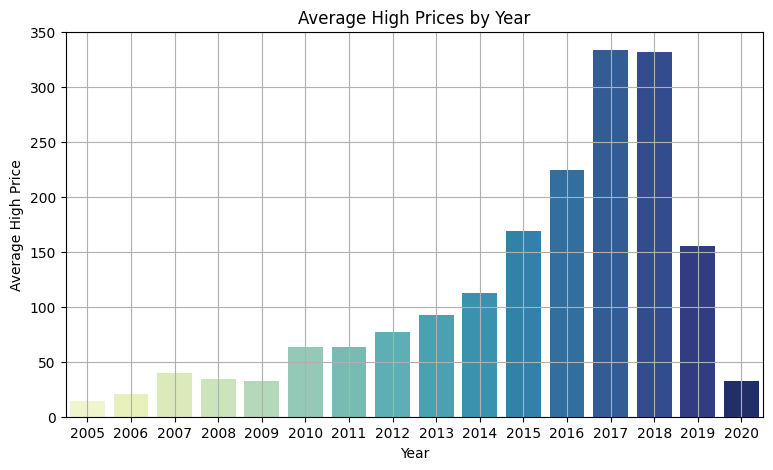

In [21]:
# Chart visualization code
avg_high_year = df.groupby('Year')['High'].mean().reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Year', y='High', data=avg_high_year, palette='YlGnBu')
plt.title('Average High Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average High Price')
plt.grid(True)
plt.show()


Why this chart?
Helps understand how stock peaks have evolved annually.

Insights:
Rising or falling high prices signal market perception of potential growth or decline.

Business Impact:
Identifies years of investor confidence or fear — useful for back-testing strategies or investor sentiment analysis.

## ***M — Multivariate Analysis:--***

### *12. 3D Scatter Plot (Opening, High, and Closing Prices)*

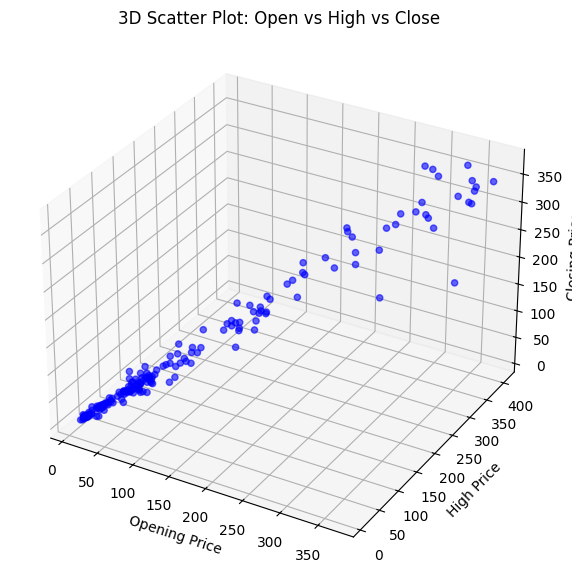

In [22]:
# Chart visualization code
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Open'], df['High'], df['Close'], c='blue', alpha=0.6)
ax.set_xlabel('Opening Price')
ax.set_ylabel('High Price')
ax.set_zlabel('Closing Price')
ax.set_title('3D Scatter Plot: Open vs High vs Close')
plt.show()


Why this chart?
To observe relationships between multiple stock price variables in 3D space.

Insights:
Often, close prices cluster near the high price when the stock gains, and near the open when stable.

Business Impact:
Aids in understanding how the three key metrics interact — useful for building robust prediction models.

### *13. Cluster Map of Correlation Matrix*

<Figure size 800x600 with 0 Axes>

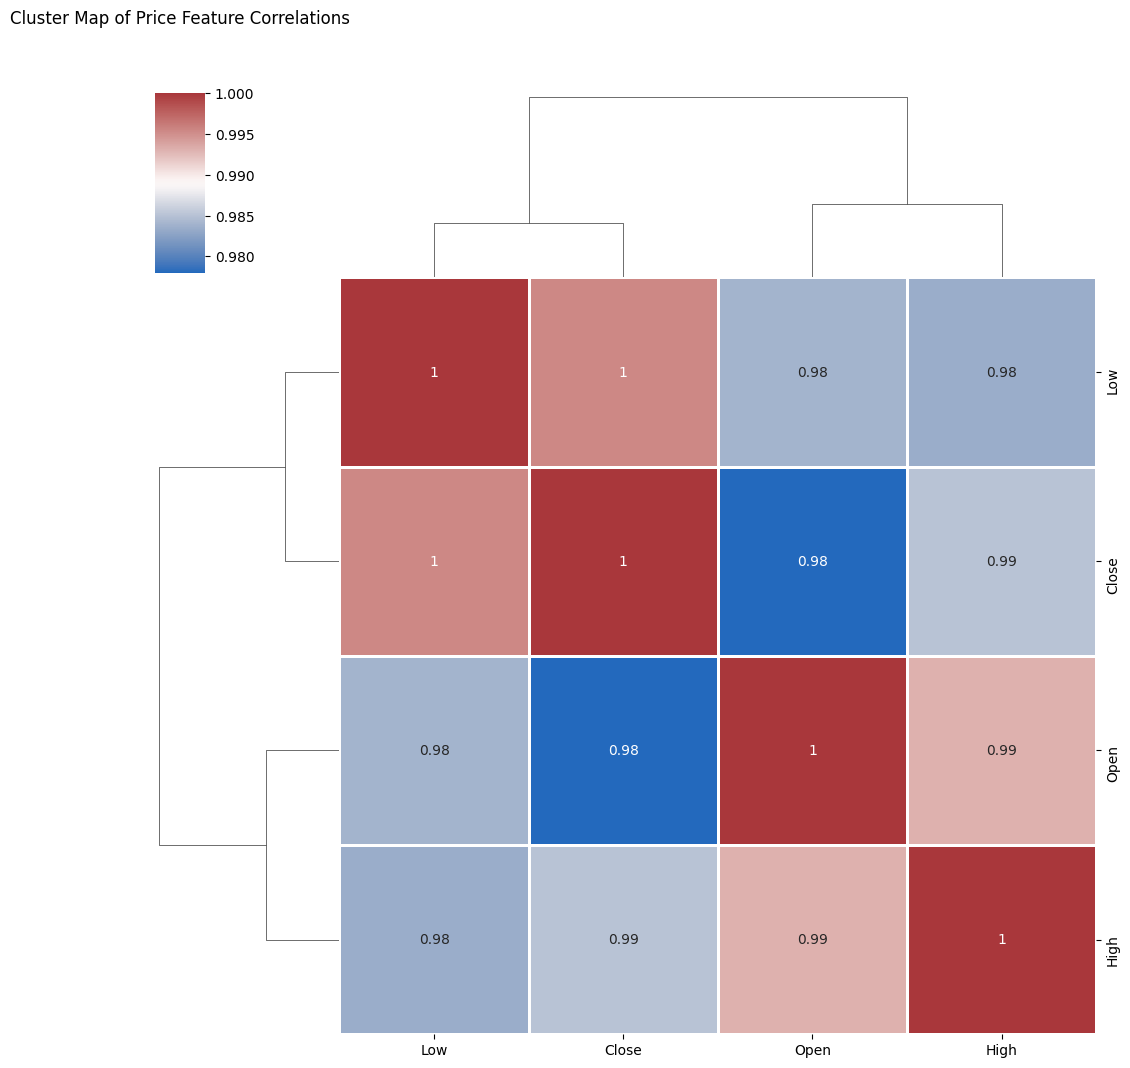

In [23]:
# Chart visualization code
plt.figure(figsize=(8, 6))
sns.clustermap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='vlag', linewidths=0.75)
plt.title('Cluster Map of Price Feature Correlations', pad=50)
plt.show()


Why this chart?
Clusters variables based on correlation, showing which features behave similarly.

Insights:
Strongly linked variables (e.g., Open and Close) are grouped, suggesting redundancy or dependence.

Business Impact:
Useful for reducing features during model training — avoids overfitting and multicollinearity.

### *14. Pair Plot with Hue Based on Price Movement (Up/Down)*

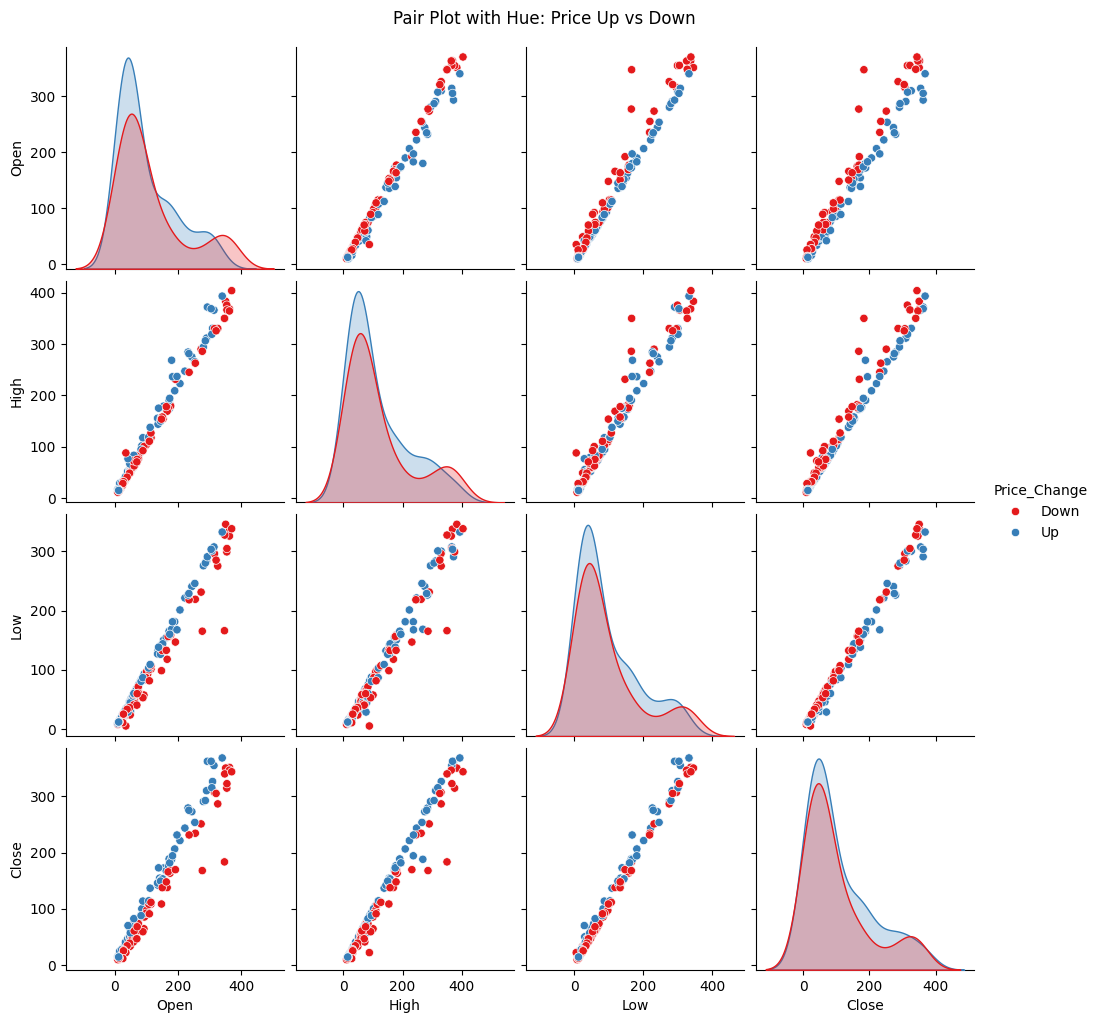

In [24]:
# Chart visualization code
df['Price_Change'] = np.where(df['Close'] > df['Open'], 'Up', 'Down')

sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Price_Change']], hue='Price_Change', palette='Set1')
plt.suptitle('Pair Plot with Hue: Price Up vs Down', y=1.02)
plt.show()


Why this chart?
Adds classification context to multivariate relationships — price rising or falling.

Insights:
You can spot patterns — e.g., when open is low and high is high, the price likely rises.

Business Impact:
Helps in creating binary classifiers or strategies (buy/sell) based on early-day metrics.

### *15. Multi-line Plot: Open, High, Low, Close Over Time*

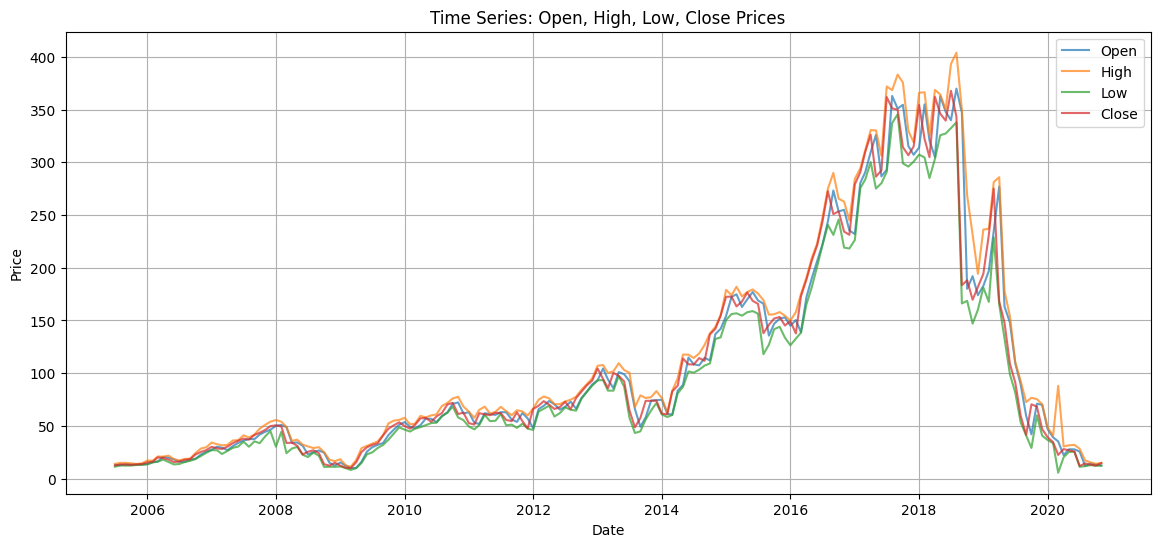

In [25]:
# Chart visualization code
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Open'], label='Open', alpha=0.7)
plt.plot(df['Date'], df['High'], label='High', alpha=0.7)
plt.plot(df['Date'], df['Low'], label='Low', alpha=0.7)
plt.plot(df['Date'], df['Close'], label='Close', alpha=0.7)
plt.title('Time Series: Open, High, Low, Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


Why this chart?
Shows all major stock price points on a single timeline for full insight.

Insights:
You can identify volatility periods (wide gaps between high/low) and price crashes or booms.

Business Impact:
Helps in building time-aware models and understanding how each metric evolves over time.

## ***5. Hypothesis Testing***

## ***6. Feature Engineering & Data Pre-processing***

### **1. Handling Missing Values**

In [26]:
print(df.isnull().sum())            # Count total missing values in each column

print("\nAfter filling:\n", df.fillna(0))            # Replaces all NaN with 0

print("\nDropping rows with NaN:\n", df.dropna())  # Drops all rows with NaN values


Date            0
Open            0
High            0
Low             0
Close           0
Month           0
Year            0
Quarter         0
Price_Change    0
dtype: int64

After filling:
           Date   Open   High    Low  Close  Month  Year  Quarter Price_Change
0   2005-07-01  13.00  14.00  11.25  12.46      7  2005        3         Down
1   2005-08-01  12.58  14.88  12.55  13.42      8  2005        3           Up
2   2005-09-01  13.48  14.87  12.27  13.30      9  2005        3         Down
3   2005-10-01  13.20  14.47  12.40  12.99     10  2005        4         Down
4   2005-11-01  13.35  13.88  12.88  13.41     11  2005        4           Up
..         ...    ...    ...    ...    ...    ...   ...      ...          ...
180 2020-07-01  25.60  28.30  11.10  11.95      7  2020        3         Down
181 2020-08-01  12.00  17.16  11.85  14.37      8  2020        3           Up
182 2020-09-01  14.30  15.34  12.75  13.15      9  2020        3         Down
183 2020-10-01  13.30  14.01

**Detects missing data in each column.**

**Helps you understand how much data is missing before deciding what to do.**

**Prevents errors during model training, as most ML models can't handle NaN.**

### **2. Handling Outliers**

In [35]:

num_cols = ['Open', 'High', 'Low', 'Close']
original_data=df.copy()
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"🔎 {col}: {outliers.shape[0]} outliers detected")
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.reset_index(drop=True, inplace=True)
print("All Outliers removed")

🔎 Open: 9 outliers detected
🔎 High: 3 outliers detected
🔎 Low: 10 outliers detected
🔎 Close: 8 outliers detected
All Outliers removed


### **5. Feature Manipulation & Selection**

### **9. Data Splitting**

#### What data splitting ratio have you used and why? (Answer)

## ***7. ML Model Implementation***

### ***My model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# ***Conclusion***

#### ****